# PCI 2017 and Demographics

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Dataset (with a Lot of Cleaning)

# 1a. Merging and Cleaning Data

In [222]:
dfwiki = pd.ExcelFile('./Provincial Data Point.xlsx')

#Tried to merge 2005 - 2017 Data :(
#Data questions changed from Vietnamese to English in 2012 :( and content of questions changed
#Data questions changed each year, realized they needed to ask about perception and added that on top and eliminated others :(

In [223]:
WikiPull = dfwiki.parse()
Provinces_WikiPull = WikiPull['Province'].unique()

In [224]:
len(Provinces_WikiPull)

63

In [225]:
data = Provinces_ExcelFile = merge_df['Province'].unique()

In [226]:
len(set(Provinces_ExcelFile) & set(Provinces_WikiPull))

63

In [227]:
def read_pci_file(file_name):
    excel_file = pd.ExcelFile(file_name)
    merge_df = None
    for sheet_name in excel_file.sheet_names:
        df_sheet = excel_file.parse(sheet_name).drop_duplicates()
        if merge_df is None:
            merge_df = df_sheet.copy()
        else:
            merge_df = pd.merge(merge_df, df_sheet, on='Province')
    merge_df.isnull().sum()
    merge_df.dropna(how='all', inplace=True)
    if 'Rank' in merge_df.columns:
        merge_df.dropna(subset=['Rank'], inplace=True)
    merge_df2 = pd.merge(merge_df, WikiPull, on='Province')
    return merge_df2
merge_df = read_pci_file('./data/Appendix_1_Table_Indicator_PCI2017_EN.xlsx')

In [228]:
sum(merge_df.columns.value_counts() > 1)

0

In [229]:
merge_df.isnull().sum().sum()

0

# 1b. Reading Data Set

In [230]:
#What factors contribute to the perception of business development or hindrance in provinces
#relating to Ease of Entry, Business Support, and 
#How does regional variation, provincial specifics matter for this variation?

#Plot diagram to answer the question
#Build models to make it better

In [231]:
merge_df.head()

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region
0,An Giang,32.0,62.158707,8.674999,6.372029,6.920630,6.876259,5.203520,4.987619,6.437278,...,0.236559,0.681818,0.045977,3536.8,2142709,605.8,28.4,0.730,3791.46,Mekong Delta
1,BRVT,16.0,64.433372,8.187503,5.942207,6.355465,6.422382,5.042396,4.327826,5.445249,...,0.160377,0.595238,0.049505,1989.6,996682,500.9,49.9,0.901,36786.39,Southeast
2,Bac Giang,30.0,62.198452,7.820781,6.539614,6.727785,5.701530,5.511934,4.719805,6.045018,...,0.135802,0.684211,0.028571,3827.4,1554131,406.1,9.4,0.711,1909.44,Northeast
3,Bac Kan,59.0,58.822109,6.246485,5.127361,6.646235,4.825339,4.280546,6.419474,4.148997,...,0.047059,0.666667,0.012821,4868.4,293826,60.4,16.1,0.685,1766.68,Northeast
4,Bac Lieu,42.0,61.090382,8.579387,6.546655,6.468497,6.698868,6.384815,5.930366,6.043301,...,0.252747,0.750000,0.036145,2584.1,856518,331.5,26.1,0.742,3701.98,Mekong Delta


In [232]:
merge_df.tail()

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region
58,Tra Vinh,37.0,61.708836,8.085987,7.305348,6.326732,7.909123,7.818160,6.307669,5.844946,...,0.151163,0.636364,0.000000,2295.1,1003012,437.0,15.3,0.717,2662.89,Mekong Delta
59,Tuyen Quang,39.0,61.511806,8.294600,6.056536,6.589673,5.788954,4.581478,4.909009,5.104384,...,0.142857,0.730769,0.039474,5870.4,724821,123.5,13.0,0.699,1948.18,Northeast
60,Vinh Long,6.0,66.072372,8.468634,6.692113,6.063775,7.402773,6.639066,5.352583,6.153907,...,0.096774,0.700000,0.000000,1479.1,1024707,692.8,15.3,0.757,3360.01,Mekong Delta
61,Vinh Phuc,12.0,64.898003,7.095162,5.767178,6.593346,7.268005,6.046066,4.995314,5.973986,...,0.162162,0.769231,0.029126,1373.2,999786,728.1,22.4,0.764,3990.61,Red River Delta
62,Yen Bai,46.0,60.720852,7.648221,5.359018,6.159721,5.893192,4.311386,5.239655,5.212481,...,0.065217,0.800000,0.035714,6899.5,740397,107.3,18.8,0.657,1845.51,Northeast


In [233]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Columns: 158 entries, Province to Region
dtypes: float64(155), int64(1), object(2)
memory usage: 78.3+ KB


In [234]:
merge_df.describe()

,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,Sub-Index 8: Business Support Services_x,...,Good security situation in the province (%),Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4]
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,32.000000,62.396843,7.799425,6.286399,6.297945,6.554949,5.373914,5.127357,5.532146,6.500402,...,0.564660,0.146409,0.698862,0.027632,5256.680952,1.396286e+06,456.677778,24.774603,0.726286,3563.131270
std,18.330303,2.943423,0.500101,0.590944,0.359828,0.810325,0.852751,0.769528,0.745088,0.593328,...,0.089873,0.051329,0.086722,0.015992,3686.374908,1.303661e+06,547.360770,15.977504,0.052193,4432.332588
min,1.000000,55.123222,6.246485,4.354074,5.326850,4.825339,4.096223,3.334866,3.633898,4.772668,...,0.339806,0.047059,0.437500,0.000000,823.100000,2.938260e+05,40.700000,9.400000,0.560000,1081.840000
25%,16.500000,60.579714,7.498890,5.987077,6.138479,6.070233,4.648548,4.665391,5.144709,6.177210,...,0.509091,0.111556,0.649906,0.017429,2327.650000,8.150550e+05,126.300000,15.000000,0.710500,2202.495000
50%,32.000000,62.158707,7.838291,6.333261,6.338750,6.483062,5.309570,5.139371,5.442083,6.607832,...,0.564815,0.135922,0.705882,0.028571,4760.100000,1.127903e+06,264.300000,19.000000,0.732000,2835.460000
75%,47.500000,64.395042,8.070281,6.649101,6.523891,7.125408,6.030849,5.617014,6.044159,6.865022,...,0.631456,0.172463,0.762353,0.038085,6804.000000,1.484008e+06,577.650000,28.500000,0.750000,3682.760000
max,63.000000,70.694397,8.925816,7.607831,7.251398,8.689983,7.818160,6.419474,7.071540,7.815090,...,0.773810,0.267327,0.894737,0.069767,16498.500000,8.262864e+06,3418.900000,86.900000,0.901000,36786.390000


In [236]:
merge_df.describe()['Good security situation in the province (%)']

count    63.000000
mean      0.564660
std       0.089873
min       0.339806
25%       0.509091
50%       0.564815
75%       0.631456
max       0.773810
Name: Good security situation in the province (%), dtype: float64

In [237]:
print(merge_df['Sub-Index 1: Entry Costs'].mean())
print(merge_df['Sub-Index 2: Land Access & Tenure'].mean())
print(merge_df['Sub-Index 3: Transparency_x'].mean())
print(merge_df['Sub-Index 4: Time Costs_x'].mean())
print(merge_df['Sub-Index 5: Informal Charges_x'].mean())
print(merge_df['Sub-Index 6: Policy Bias_x'].mean())
print(merge_df['Sub-Index 7: Proactivity_x'].mean())
print(merge_df['Sub-Index 8: Business Support Services_x'].mean())
print(merge_df['Sub-Index 9: Labor Policy_x'].mean())
print(merge_df['Sub-Index 10: Law & Order_x'].mean())

7.799425178103977
6.286399356902591
6.297945196666415
6.5549494501144165
5.373914347754584
5.127356691965981
5.532145579655965
6.500401807209802
6.415931663815937
5.888466993967692


In [238]:
merge_df.groupby('Region').mean()

,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,Sub-Index 8: Business Support Services_x,...,Good security situation in the province (%),Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4]
Region,,,,,,,,,,,,,,,,,,,,,
Central Highlands,44.000000,60.050594,7.297989,6.525217,6.343820,5.909366,4.693005,5.401422,5.176982,6.622418,...,0.506097,0.162401,0.682477,0.039448,10931.920000,1.023025e+06,90.980000,27.720000,0.699600,2797.380000
Mekong Delta,26.461538,63.397955,8.197669,6.736032,6.323055,7.461749,6.444099,5.731918,6.067366,6.245545,...,0.543982,0.193385,0.691622,0.023568,3123.438462,1.322421e+06,483.800000,22.784615,0.745154,3540.573077
North Central Coast,35.000000,61.734313,7.971100,6.289382,6.282704,6.249657,4.832992,4.263992,5.496890,6.504200,...,0.543834,0.148103,0.766286,0.035352,8586.016667,1.678385e+06,188.450000,19.433333,0.717167,2479.881667
Northeast,35.818182,62.112871,7.611349,5.870189,6.325123,6.057390,4.908508,5.232159,5.325657,6.645699,...,0.616483,0.105339,0.715431,0.025894,5820.472727,8.614998e+05,175.054545,19.936364,0.691636,2489.565455
Northwest,54.250000,59.425341,7.696385,5.605862,6.424155,5.730517,4.532416,5.397055,4.952261,6.395855,...,0.685203,0.105041,0.784825,0.022685,9383.350000,6.805200e+05,83.875000,14.500000,0.630000,1696.975000
Red River Delta,30.200000,62.579596,7.496406,6.041293,5.994006,6.562955,5.321219,4.618545,5.291541,6.466974,...,0.545121,0.116134,0.696698,0.032414,1486.170000,1.945830e+06,1131.950000,21.880000,0.751200,2983.867000
South Central Coast,23.000000,63.957892,8.037875,6.495766,6.503990,6.624663,5.687373,5.233297,5.751059,6.549185,...,0.558167,0.165726,0.699555,0.018380,5545.762500,1.095605e+06,254.187500,35.612500,0.739375,3353.056250
Southeast,24.166667,62.961135,7.783351,6.456297,6.318424,6.789013,5.247649,4.787279,5.578002,6.741104,...,0.544948,0.157180,0.575776,0.029724,3934.016667,2.527894e+06,880.266667,38.066667,0.785500,9791.231667


# 2. Visualization

# 2a. Transparency

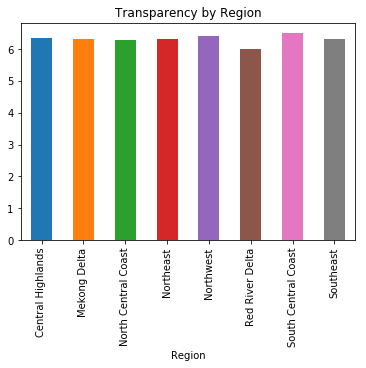

In [239]:
merge_df.groupby('Region').mean()['Sub-Index 3: Transparency_x'].plot(kind='bar')
plt.title('Transparency by Region')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


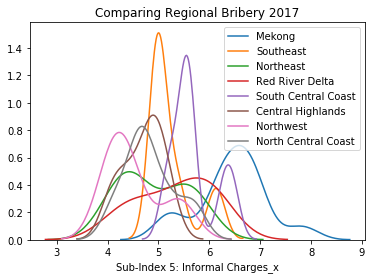

In [240]:
sns.distplot(merge_df[merge_df['Region'] == 'Mekong Delta']['Sub-Index 5: Informal Charges_x'], hist=False, label='Mekong')
sns.distplot(merge_df[merge_df['Region'] == 'Southeast']['Sub-Index 5: Informal Charges_x'], hist=False, label='Southeast')
sns.distplot(merge_df[merge_df['Region'] == 'Northeast']['Sub-Index 5: Informal Charges_x'], hist=False, label='Northeast')
sns.distplot(merge_df[merge_df['Region'] == 'Red River Delta']['Sub-Index 5: Informal Charges_x'], hist=False, label='Red River Delta')
sns.distplot(merge_df[merge_df['Region'] == 'South Central Coast']['Sub-Index 5: Informal Charges_x'], hist=False, label='South Central Coast')
sns.distplot(merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 5: Informal Charges_x'], hist=False, label='Central Highlands')
sns.distplot(merge_df[merge_df['Region'] == 'Northwest']['Sub-Index 5: Informal Charges_x'], hist=False, label='Northwest')
sns.distplot(merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 5: Informal Charges_x'], hist=False, label='North Central Coast')
plt.title('Comparing Regional Bribery 2017')
plt.show()

In [262]:
#Corruption / Business Development
def convert_percent(number):
    return 0
CorruptionCosts = merge_df['Formal and informal costs are acceptable (%)']
#merge_df['costs'] = pd.cut(costs, bins=10)
merge_df['Costs'] = pd.cut(costs,bins=[0,.2,.4,.6,.8,1], labels=["Poor","Below Average","Average","Good","Great"])

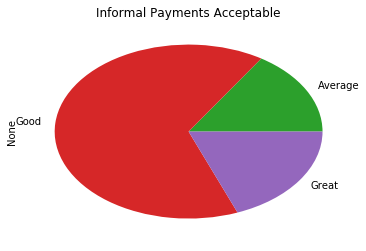

In [263]:
plot_df = merge_df.groupby('Costs').size()
plot_df.plot(kind="pie")
plt.title('Informal Payments Acceptable')
plt.show()

# 2b. Business Support Services

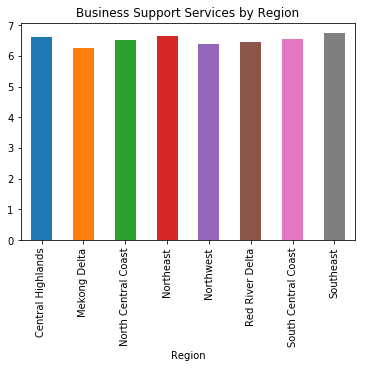

In [265]:
merge_df.groupby('Region').mean()['Sub-Index 8: Business Support Services_x'].plot(kind='bar')
plt.title('Business Support Services by Region')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


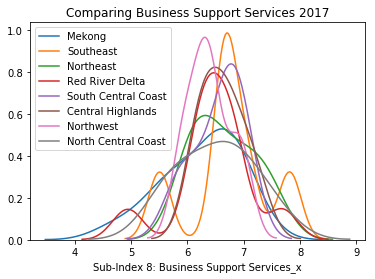

In [266]:
sns.distplot(merge_df[merge_df['Region'] == 'Mekong Delta']['Sub-Index 8: Business Support Services_x'], hist=False, label='Mekong')
sns.distplot(merge_df[merge_df['Region'] == 'Southeast']['Sub-Index 8: Business Support Services_x'], hist=False, label='Southeast')
sns.distplot(merge_df[merge_df['Region'] == 'Northeast']['Sub-Index 8: Business Support Services_x'], hist=False, label='Northeast')
sns.distplot(merge_df[merge_df['Region'] == 'Red River Delta']['Sub-Index 8: Business Support Services_x'], hist=False, label='Red River Delta')
sns.distplot(merge_df[merge_df['Region'] == 'South Central Coast']['Sub-Index 8: Business Support Services_x'], hist=False, label='South Central Coast')
sns.distplot(merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 8: Business Support Services_x'], hist=False, label='Central Highlands')
sns.distplot(merge_df[merge_df['Region'] == 'Northwest']['Sub-Index 8: Business Support Services_x'], hist=False, label='Northwest')
sns.distplot(merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 8: Business Support Services_x'], hist=False, label='North Central Coast')
plt.title('Comparing Business Support Services 2017')
plt.show()

In [267]:
#Information Accessbility / Business Support Services
def convert_percent(number):
    return 0
Transparent_Info = merge_df['Received information requested (% YES)']
#merge_df['costs'] = pd.cut(costs, bins=10)
merge_df['Information'] = pd.cut(costs,bins=[0,.3,.5,.7,.9,1], labels=["Poor","Below Average","Average","Good","Great"])

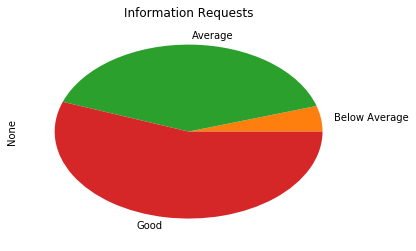

In [268]:
plot_transparency = merge_df.groupby('Information').size()
plot_transparency.plot(kind="pie")
plt.title('Information Requests')
plt.show()

# 2c. Ease of Entry

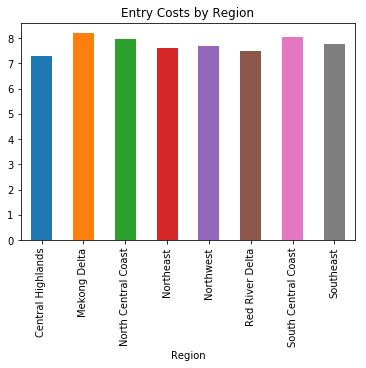

In [269]:
merge_df.groupby('Region').mean()['Sub-Index 1: Entry Costs'].plot(kind='bar')
plt.title('Entry Costs by Region')
plt.show()

In [270]:
#boolean index to select column and compare to a value
merge_df['Region'] == 'North Central Coast'
merge_df[merge_df['Region'] == 'North Central Coast']

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region,Costs,Information,Procedures
24,Ha Tinh,33.0,61.989574,7.556122,6.031947,6.160573,5.651978,4.758788,3.334866,5.734115,...,5990.6,1227038,203.6,14.9,0.725,2117.32,North Central Coast,Good,Good,Average
39,Nghe An,21.0,63.523487,7.845611,6.161352,6.382609,6.721156,4.677422,3.622885,5.135136,...,16498.5,2912041,176.5,12.9,0.715,2379.59,North Central Coast,Good,Good,Average
44,Quang Binh,45.0,60.816540,8.168670,6.078396,5.672749,6.180349,5.155704,4.820374,5.649062,...,8065.3,844893,104.8,15.0,0.716,2203.01,North Central Coast,Good,Average,Below Average
48,Quang Tri,54.0,59.248184,8.026699,6.048230,6.587082,6.305892,4.157804,4.758132,5.078798,...,4760.1,598324,125.7,27.4,0.696,2672.10,North Central Coast,Good,Average,Below Average
52,TT-Hue,29.0,62.366547,7.928104,6.457467,6.531539,6.406902,5.676109,4.436716,5.812533,...,5065.3,1087420,214.7,36.0,0.735,3072.58,North Central Coast,Great,Good,Good
56,Thanh Hoa,28.0,62.461548,8.301397,6.958903,6.361669,6.231665,4.572128,4.610978,5.571698,...,11136.3,3400595,305.4,10.4,0.716,2434.69,North Central Coast,Great,Good,Good


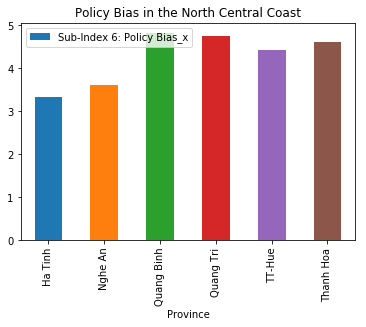

In [271]:
#merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 6: Political Bias_x'].plot(kind='bar')
merge_df[merge_df['Region'] == 'North Central Coast'].plot(kind='bar', x='Province', y='Sub-Index 6: Policy Bias_x')
plt.title('Policy Bias in the North Central Coast')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


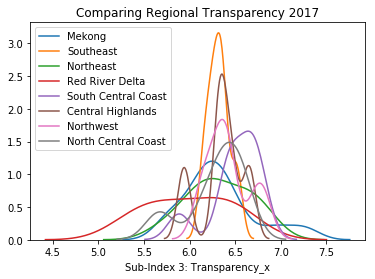

In [272]:
sns.distplot(merge_df[merge_df['Region'] == 'Mekong Delta']['Sub-Index 3: Transparency_x'], hist=False, label='Mekong')
sns.distplot(merge_df[merge_df['Region'] == 'Southeast']['Sub-Index 3: Transparency_x'], hist=False, label='Southeast')
sns.distplot(merge_df[merge_df['Region'] == 'Northeast']['Sub-Index 3: Transparency_x'], hist=False, label='Northeast')
sns.distplot(merge_df[merge_df['Region'] == 'Red River Delta']['Sub-Index 3: Transparency_x'], hist=False, label='Red River Delta')
sns.distplot(merge_df[merge_df['Region'] == 'South Central Coast']['Sub-Index 3: Transparency_x'], hist=False, label='South Central Coast')
sns.distplot(merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 3: Transparency_x'], hist=False, label='Central Highlands')
sns.distplot(merge_df[merge_df['Region'] == 'Northwest']['Sub-Index 3: Transparency_x'], hist=False, label='Northwest')
sns.distplot(merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 3: Transparency_x'], hist=False, label='North Central Coast')
plt.title('Comparing Regional Transparency 2017')
plt.show()

In [273]:
#Information Requests / Ease of Entry
def convert_percent(number):
    return 0
Access_Support = merge_df['Procedures at one-stop-shop are transparently listed  (% Agree)']
#merge_df['costs'] = pd.cut(costs, bins=10)
merge_df['Procedures'] = pd.cut(costs,bins=[0,.5,.65,.8,.9,1], labels=["Poor","Below Average","Average","Good","Great"])

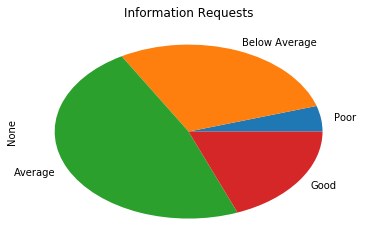

In [274]:
plot_access = merge_df.groupby('Procedures').size()
plot_access.plot(kind="pie")
plt.title('Information Requests')
plt.show()

# Preprocessing

In [284]:
merge_df.head(6)

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region,Costs,Information,Procedures
0,An Giang,32.0,62.158707,8.674999,6.372029,6.920630,6.876259,5.203520,4.987619,6.437278,...,3536.8,2142709,605.8,28.4,0.730,3791.46,Mekong Delta,Good,Good,Average
1,BRVT,16.0,64.433372,8.187503,5.942207,6.355465,6.422382,5.042396,4.327826,5.445249,...,1989.6,996682,500.9,49.9,0.901,36786.39,Southeast,Average,Average,Below Average
2,Bac Giang,30.0,62.198452,7.820781,6.539614,6.727785,5.701530,5.511934,4.719805,6.045018,...,3827.4,1554131,406.1,9.4,0.711,1909.44,Northeast,Great,Good,Good
3,Bac Kan,59.0,58.822109,6.246485,5.127361,6.646235,4.825339,4.280546,6.419474,4.148997,...,4868.4,293826,60.4,16.1,0.685,1766.68,Northeast,Great,Good,Good
4,Bac Lieu,42.0,61.090382,8.579387,6.546655,6.468497,6.698868,6.384815,5.930366,6.043301,...,2584.1,856518,331.5,26.1,0.742,3701.98,Mekong Delta,Good,Average,Average
5,Bac Ninh,17.0,64.356712,7.273473,6.567050,5.925251,6.649046,5.898842,3.846736,5.813507,...,823.1,1024472,1244.7,23.5,0.771,4451.41,Red River Delta,Good,Good,Average


In [285]:
X = merge_df.drop(columns=['Province', 'Region', 'Rank', 'Information', 'Procedures', 'Costs', 'The Weighted PCI Score in 2017'])
y = merge_df['The Weighted PCI Score in 2017']

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create Model

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
model = LogisticRegression()

In [290]:
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [291]:
prediction = model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [292]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [293]:
confusion_matrix(y_test, prediction)

NameError: name 'prediction' is not defined

In [187]:
report = classification_report(y_test, prediction)
print(report)

NameError: name 'prediction' is not defined

# Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
# create model
dtc = DecisionTreeClassifier(random_state=101)
# fit model
dtc.fit(X_train, y_train)
# predict base on test set
prediction = dtc.predict(X_test)

# classification_report confusion_matrix
matrix = confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(matrix)
print(report)

ValueError: Unknown label type: 'continuous'

# Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
# create model
rfc = RandomForestClassifier()
# fit model
rfc.fit(X_train, y_train)
# predict base on test set
prediction = rfc.predict(X_test)
# classification_report confusion_matrix
report = classification_report(y_test, prediction)
print(matrix)
print(report)

ValueError: Unknown label type: 'continuous'

# Visualize Decision Tree

In [196]:
# create model
dtc = DecisionTreeClassifier(random_state=101, max_depth=4)
# fit model
dtc.fit(X_train, y_train)
# predict base on test set
prediction = dtc.predict(X_test)

# classification_report confusion_matrix
matrix = confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(matrix)
print(report)

ValueError: Unknown label type: 'continuous'

In [197]:
from dtreeviz.trees import *

ModuleNotFoundError: No module named 'dtreeviz'

In [198]:
viz = dtreeviz(dtc, 
               X_train, 
               y_train,
               target_name='variety',
              feature_names=X_train.columns, 
               class_names=["Un-survived", "Survived"]  # need class_names for classifier
              )  
              
viz.view()

NameError: name 'dtreeviz' is not defined